<a href="https://colab.research.google.com/github/zinakhazaee/MachineLearning-SupervisedLearning_Classification/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV , GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
import pickle

In [2]:
iris = datasets.load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.data

In [20]:
X = pd.DataFrame(iris.data , columns=iris.feature_names )

In [21]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [23]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
len(X)

150

In [25]:
len(y)

150

In [26]:
np.unique(y , return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [29]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


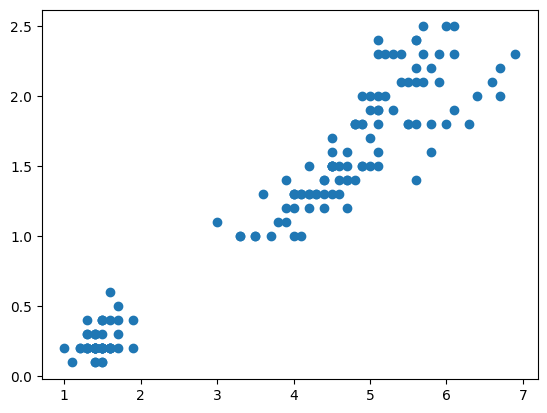

In [30]:
plt.scatter(x= X['petal length (cm)'] , y= X['petal width (cm)'])
#plt.xlabel("petal length")
#plt.ylabel('petal width')
plt.show()

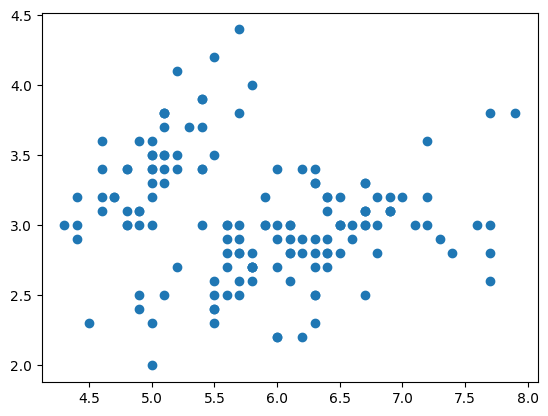

In [31]:
plt.scatter(x=X['sepal length (cm)'] , y= X['sepal width (cm)'])
#plt.xlabel('sepal length (cm)')
#plt.ylabel('sepal width (cm)')
plt.show()

## Model1 : clf with Scaler

In [32]:
scale = MinMaxScaler()
X = scale.fit_transform(X)

In [33]:
x_train , x_test , y_train , y_test = train_test_split(X ,y , test_size= 0.2 , random_state= 123)

In [34]:
KNN = KNeighborsClassifier()

In [35]:
params = {
    'n_neighbors':np.arange(1,12),
    'p': [2,3,4,5],
    'weights': ['uniform' , 'distance']
}

In [36]:
clf = GridSearchCV(KNN , param_grid= params , scoring= 'accuracy' , cv= 5 , return_train_score= True , refit= True)
clf_record = clf.fit(x_train , y_train)

In [37]:
clf_record.best_estimator_

KNeighborsClassifier(p=3)

In [38]:
clf.best_params_

{'n_neighbors': 5, 'p': 3, 'weights': 'uniform'}

In [39]:
clf.best_score_

0.9833333333333334

In [40]:
clf.score(x_train , y_train)

0.9833333333333333

In [41]:
clf.score(x_test , y_test)

0.9666666666666667

In [42]:
y_pred = clf.predict(x_test)

In [43]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92         7
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



In [44]:
confusion_matrix(y_pred , y_test)

array([[13,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 10]])

In [45]:
samples = (
    [4.5,2.1,2.2,0.5],
    [5.5,3.5,3.2,1.1],
    [6.5,3.9,5.3,1.9])

In [46]:
clf.predict(scale.transform(samples))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([1, 1, 2])

In [47]:
targets = {}
for i , t in enumerate(iris.target_names):
  targets.update({i:t})

In [48]:
targets[1]

'versicolor'

In [50]:
with open('knn_model_clf.pickle','wb') as f:
  pickle.dump(clf,f)